# Data Checks

Quick overview of data checks and explorations for a session of XX data.

In [1]:
from convnwb.io import load_nwbfile

from spiketools.measures.spikes import compute_firing_rate
from spiketools.plts.spatial import plot_position_by_time
from spiketools.plts.spikes import plot_firing_rates
from spiketools.plts.trials import plot_rasters
from spiketools.utils.timestamps import convert_sec_to_min

In [2]:
# Local imports
import sys
sys.path.append('../code')

## Settings

In [3]:
# Define the base data folder
data_folder = '/data12/jacobs_lab/OMCN/nwb'

In [4]:
# Define subject information
session = {
    'experiment' : 'TRAIN',
    'subject' : 'R1219C',
    'session' : 0    
}

## Load Data

In [5]:
# Load NWB file
nwbfile = load_nwbfile(session, data_folder)

In [6]:
# Check the NWBfile contents
nwbfile

root pynwb.file.NWBFile at 0x47955118668288
Fields:
  acquisition: {
    boundaries <class 'pynwb.behavior.Position'>,
    position <class 'pynwb.behavior.Position'>
  }
  data_collection: unknown
  devices: {
    Microwire Electrodes <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    BF electrode <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experiment_description: Task: TRAIN (english)
  experimenter: ['Qasim, Salman' 'Jacobs, Joshua']
  file_create_date: [datetime.datetime(2023, 4, 19, 23, 12, 44, 954179, tzinfo=tzoffset(None, -14400))]
  identifier: XX
  institution: Columbia University
  intervals: {
    trials <class 'pynwb.epoch.TimeIntervals'>
  }
  keywords: <HDF5 dataset "keywords": shape (3,), type "|O">
  lab: Electrophysiology, Memory, and Navigation Laboratory
  notes: The exact subtracted timestamp is: 116.9224482421875
  processing: {
    position_measures <class 'pynwb.base.ProcessingModule'>
  }

## Check Position Data

In [7]:
# Grab the position data
pos = nwbfile.acquisition['position']['player_position']

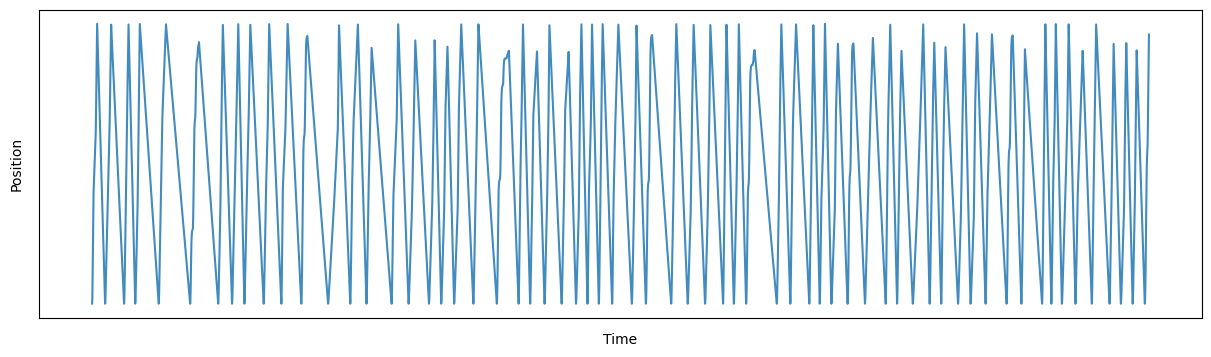

In [8]:
# Plot position across time
plot_position_by_time(pos.timestamps[:], pos.data[:], alpha=0.85, figsize=(15, 4))

## Check Events

In [9]:
# Check the trials data
nwbfile.trials

trials pynwb.epoch.TimeIntervals at 0x47955118667616
Fields:
  colnames: ['start_time' 'stop_time' 'drive_type' 'feedback_start_time'
 'feedback_stop_time' 'fixation_start_time' 'fixation_stop_time'
 'hold_start_time' 'hold_stop_time' 'movement_start_time'
 'movement_stop_time' 'object' 'object_position' 'response_error'
 'response_position' 'response_time' 'trial_type']
  columns: (
    start_time <class 'hdmf.common.table.VectorData'>,
    stop_time <class 'hdmf.common.table.VectorData'>,
    drive_type <class 'hdmf.common.table.VectorData'>,
    feedback_start_time <class 'hdmf.common.table.VectorData'>,
    feedback_stop_time <class 'hdmf.common.table.VectorData'>,
    fixation_start_time <class 'hdmf.common.table.VectorData'>,
    fixation_stop_time <class 'hdmf.common.table.VectorData'>,
    hold_start_time <class 'hdmf.common.table.VectorData'>,
    hold_stop_time <class 'hdmf.common.table.VectorData'>,
    movement_start_time <class 'hdmf.common.table.VectorData'>,
    movement

In [10]:
# Check the number of trials
n_trials = len(nwbfile.trials)
print('Number of trials: {:d}'.format(n_trials))

Number of trials: 64


In [11]:
# Get the trial information as a dataframe
behav = nwbfile.trials.to_dataframe()
behav.head()

,start_time,stop_time,drive_type,feedback_start_time,feedback_stop_time,fixation_start_time,fixation_stop_time,hold_start_time,hold_stop_time,movement_start_time,movement_stop_time,object,object_position,response_error,response_position,response_time,trial_type
id,,,,,,,,,,,,,,,,,
0,-6.183564,20.770535,automatic,16.318849,20.770535,11.318849,16.318849,-6.183564,-4.082712,-4.082712,11.318849,barrel,-19.2132,6.58810,-25.80130,1.179917,first
1,20.770535,57.926915,automatic,45.102819,57.926915,40.102819,45.102819,20.770535,22.585407,22.585407,40.102819,barrel,-19.2132,24.33350,5.12030,35.065527,repeat
2,57.926915,82.344193,automatic,80.759305,82.344193,75.759305,80.759305,57.926915,61.507662,61.507662,75.759305,barrel,-19.2132,34.44710,15.23390,72.102915,repeat
3,82.344193,119.715558,automatic,103.828678,119.715558,98.828678,103.828678,82.344193,84.292056,84.292056,98.828678,barrel,-19.2132,14.21883,-4.99437,93.823384,repeat
4,119.715558,159.073782,automatic,157.551889,159.073782,152.551889,157.551889,119.715558,132.581650,132.581650,152.551889,barrel,-19.2132,14.50030,-33.71350,136.945343,repeat


## Check Units

In [12]:
# Check the units data
nwbfile.units

units pynwb.misc.Units at 0x47955118669728
Fields:
  colnames: ['channel' 'spike_times' 'electrodes']
  columns: (
    channel <class 'hdmf.common.table.VectorData'>,
    spike_times_index <class 'hdmf.common.table.VectorIndex'>,
    spike_times <class 'hdmf.common.table.VectorData'>,
    electrodes_index <class 'hdmf.common.table.VectorIndex'>,
    electrodes <class 'hdmf.common.table.DynamicTableRegion'>
  )
  description: Spike sorting solutions - done with XX by XX.
  id: id <class 'hdmf.common.table.ElementIdentifiers'>
  waveform_unit: volts

In [13]:
# Check how many units are available
n_units = len(nwbfile.units)
print('Number of unit: {}'.format(n_units))

Number of unit: 23


In [14]:
# Check the total number of spikes
print('Total number of spikes: {}'.format(nwbfile.units.spike_times.shape[0]))

Total number of spikes: 248614


In [15]:
# Get spiking activity from across all units
all_spikes = [nwbfile.units.get_unit_spike_times(uind) for uind in range(n_units)]

In [16]:
# Calculate the average overall firing rate of each neuron
rates = [compute_firing_rate(spikes) for spikes in all_spikes]

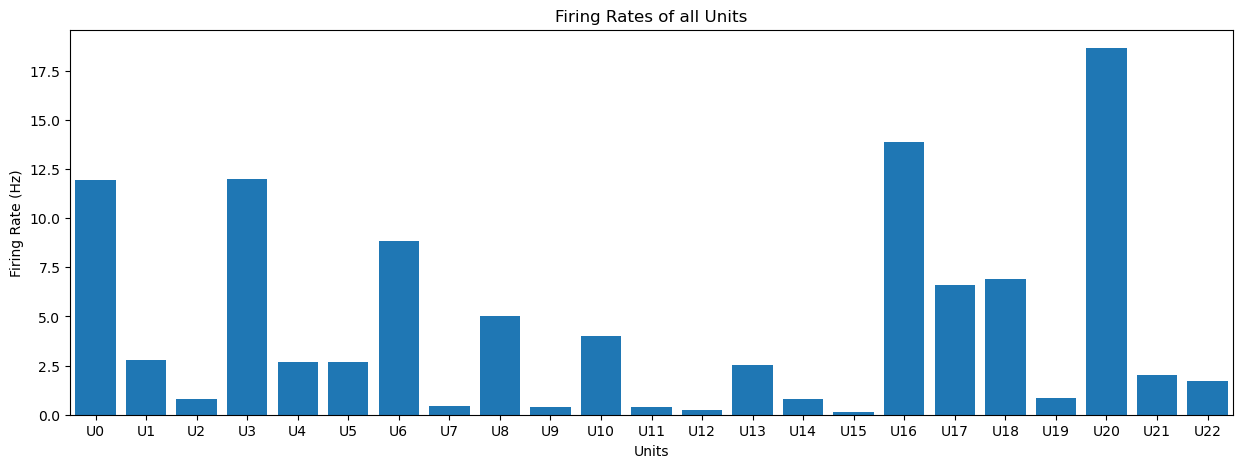

In [17]:
# Plot approximate firing rate for each unit
plot_firing_rates(rates, figsize=(15, 5))

In [18]:
# Set start and stop time of the task (note that 0 is task start time)
st = 0
en = nwbfile.trials.stop_time[-1]

In [19]:
# Compute the task length, in minutes
task_len = convert_sec_to_min(en)

In [20]:
# Check the task / recording length, based on unit time
print('Task length: {:1.2f} minutes'.format(task_len))

Task length: 36.34 minutes


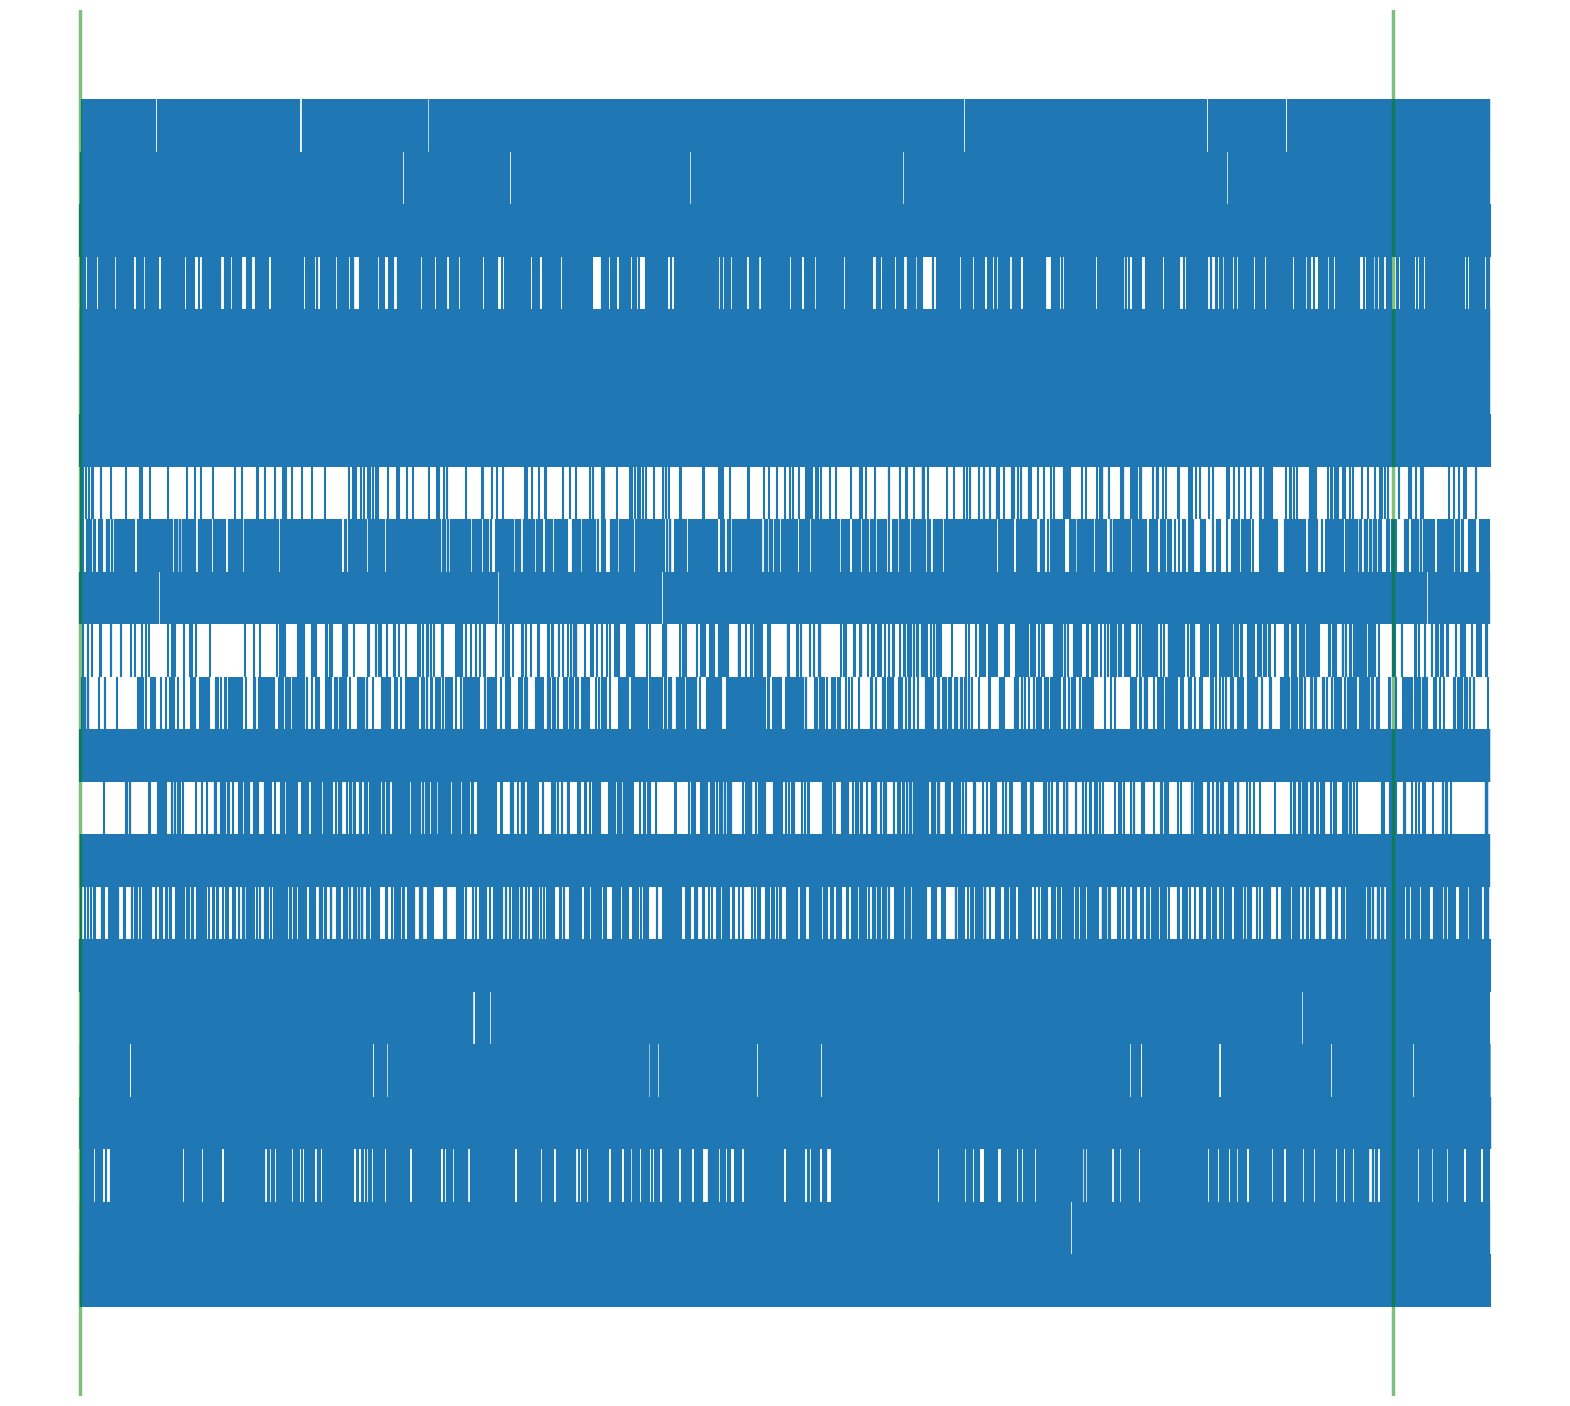

In [21]:
# Plot the session-level raster plot across all units together
plot_rasters(all_spikes, vline=[st, en], figsize=(20, 18))